## Immigration via Waffle Charts, and Regression Plots

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle charts

%matplotlib inline
mpl.style.use('ggplot')

import numpy as np
import pandas as pd
from PIL import Image

import seaborn as sns

In [2]:
df_can = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv')
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


## Waffle Charts

In [3]:
df_can.set_index('Country', inplace=True)
df_dns = df_can.loc[['Denmark','Norway','Sweden'], :]
df_dns

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Let's make this waffle chart from scratch:

Calculating proprotions of categories:

In [4]:
# gets sum of totals
total_vals = df_dns['Total'].sum()
# get catogory proportion to toal
category_proportions = df_dns['Total']/ total_vals

Defining size of chart:

In [8]:
w = 40
h = 10
total_tiles = w * h

Mapping proportions to # of tiles:

In [6]:
# getting tiles per category
tile_per_category = (category_proportions * total_tiles).round().astype(int)

Creating and populating matrix:

In [9]:
# init chart as empty matrix
waffle_chart = np.zeros((h,w), dtype = np.uint)

# define indices to loop chart
cat_index = 0
tile_index = 0

# populating
for col in range(w):
    for row in range(h):
        tile_index += 1 
        # if num of tiles populated = corresponding # of allocated tiles
        if tile_index > sum(tile_per_category[0:cat_index]):
            # move to next category
            cat_index += 1
        # set category value to int, ++ with category
        waffle_chart[row,col] = cat_index
print('Done')

Done


Mapping matrix to waffle chart visual:

<Figure size 640x480 with 0 Axes>

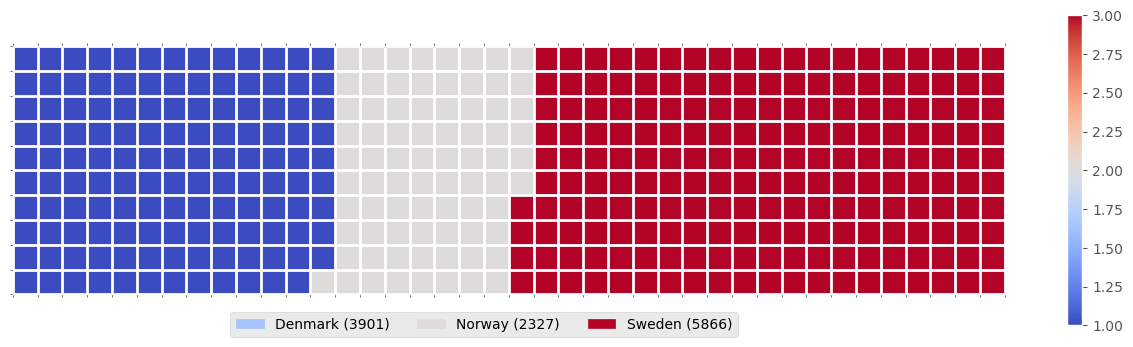

In [23]:
fig = plt.figure()

# use matshow to display chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart,cmap=colormap)
plt.colorbar()

# get axis
ax = plt.gca()

# add gridlines based on minor ticks
ax.set_xticks(np.arange(-.5, (w), 1),minor=True)
ax.set_yticks(np.arange(-.5, (h), 1),minor=True)
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# calculate cumulative sum of catrgoties
values_cumsum = np.cumsum(df_dns['Total'])
total_vals = values_cumsum[len(values_cumsum) - 1]

# creating legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + ' (' + str(df_dns['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_vals)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles=legend_handles,
           loc='lower center', 
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )
plt.show()

#### Visualizing China and India proportional contribution to total immigration:
This time using <code>pywaffle</code>.

In [24]:
from pywaffle import Waffle

Extracting our data:

In [25]:
df_china_india = df_can.loc[['China','India'], :]
df_china_india.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904


Creating waffle chart:

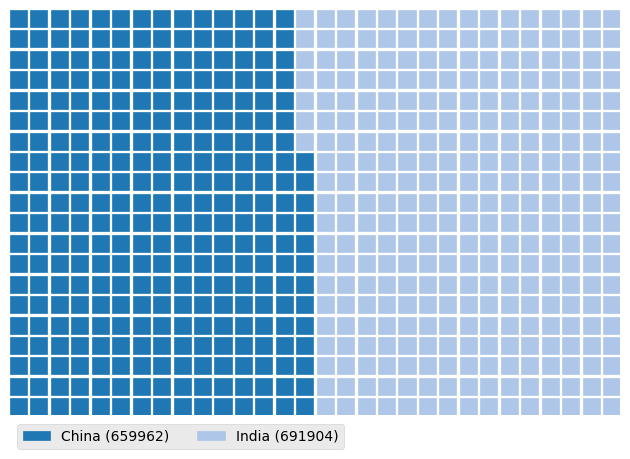

In [35]:
fig = plt.figure(FigureClass = Waffle,
                 rows = 20, columns = 30,
                 values = df_china_india['Total'],
                 cmap_name = 'tab20', 
                 # list comprehension for creating list of labels
                 legend = {'labels': [f"{k} ({v})" for k, v in zip(df_china_india.index.values,df_china_india.Total)],
                            'loc': 'lower left', 'bbox_to_anchor':(0,-0.1),'ncol': 3})
plt.show()



## Plotting with Seaborn

#### Categorical Plots
<code>Countplot</code>, may be thought of as a histogram across a categorical varible, instead of quantative.

In [36]:
df_can['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania',
       'Latin America and the Caribbean', 'Northern America'],
      dtype=object)

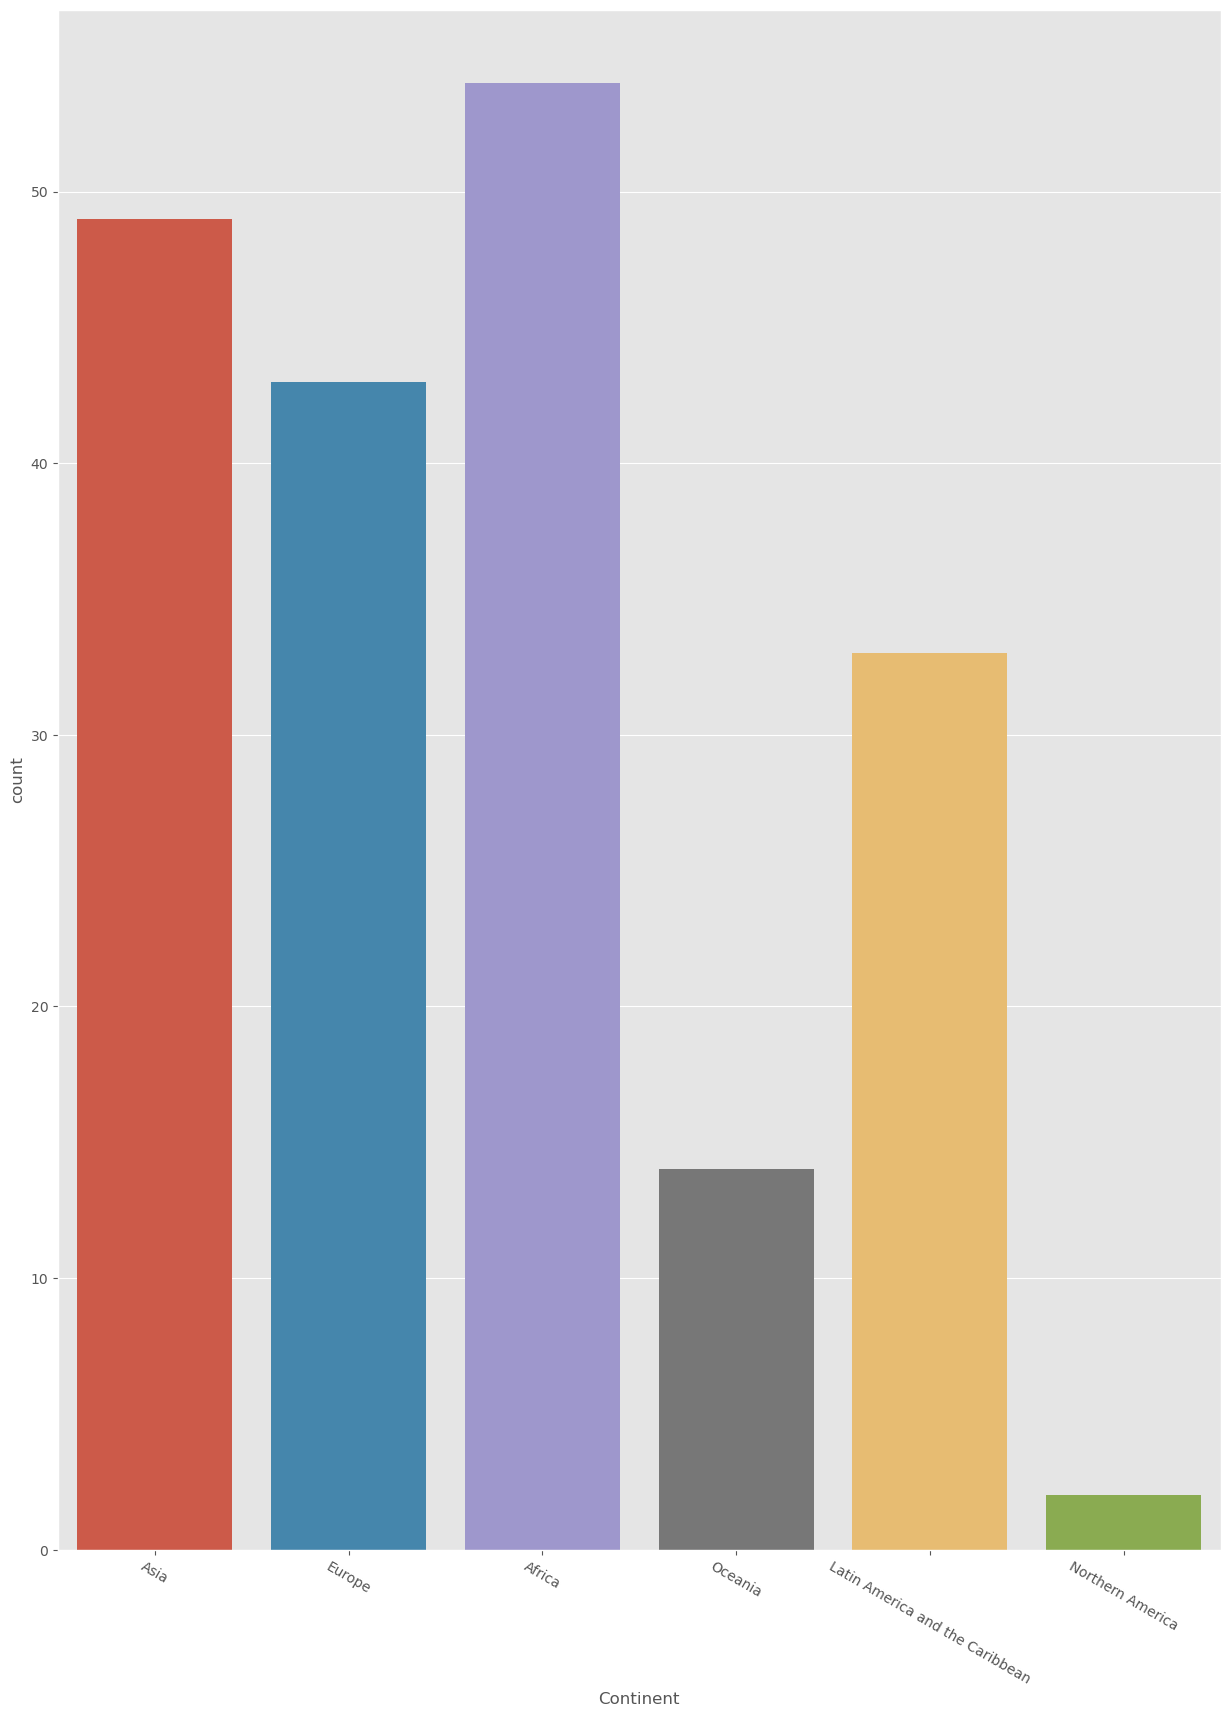

In [54]:
plt.figure(figsize=(15, 20))
ax = sns.countplot(x='Continent',data=df_can)
ax.tick_params(axis='x', rotation=-30)

#### Barplot

Let's plot the total number of immigrants per continent:

<Axes: xlabel='Continent', ylabel='Total'>

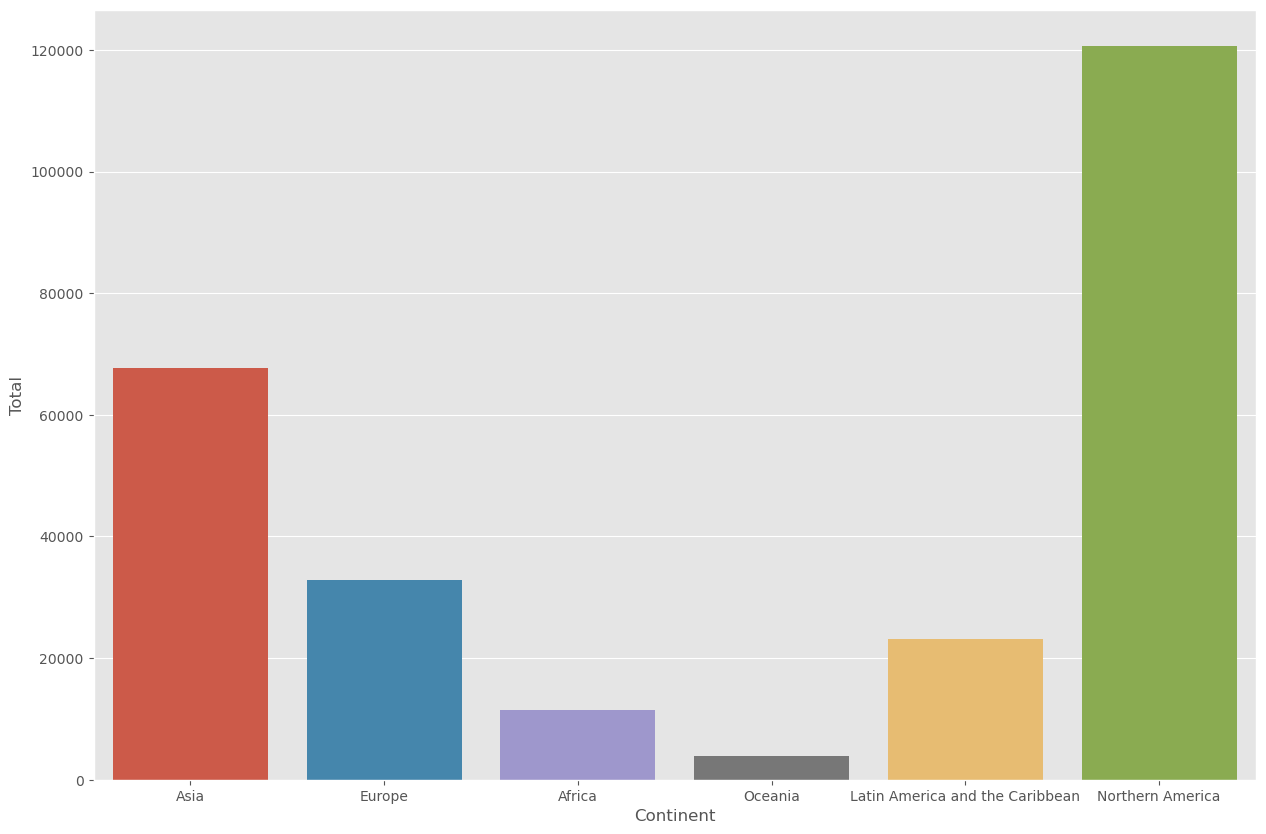

In [57]:
plt.figure(figsize=(15, 10))
sns.barplot(x='Continent', y='Total', data=df_can, errorbar=None)

#### Regression Plot

Regression plot using years vs total immigration:

In [61]:
# list of years for easy traversing
years = list(map(str, range(1980, 2014)))

# extract total immigratiom per year
df_total = pd.DataFrame(df_can[years].sum(axis=0))

# converting index to float for regression late
df_total.index = map(float, df_total.index)

# pushing years into columns
df_total.reset_index(inplace=True)

# renaming cols
df_total.columns = ['year','total']

df_total.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Total Immigration'),
 Text(0.5, 1.0, 'Total Immigration to Canada (1980-2013)')]

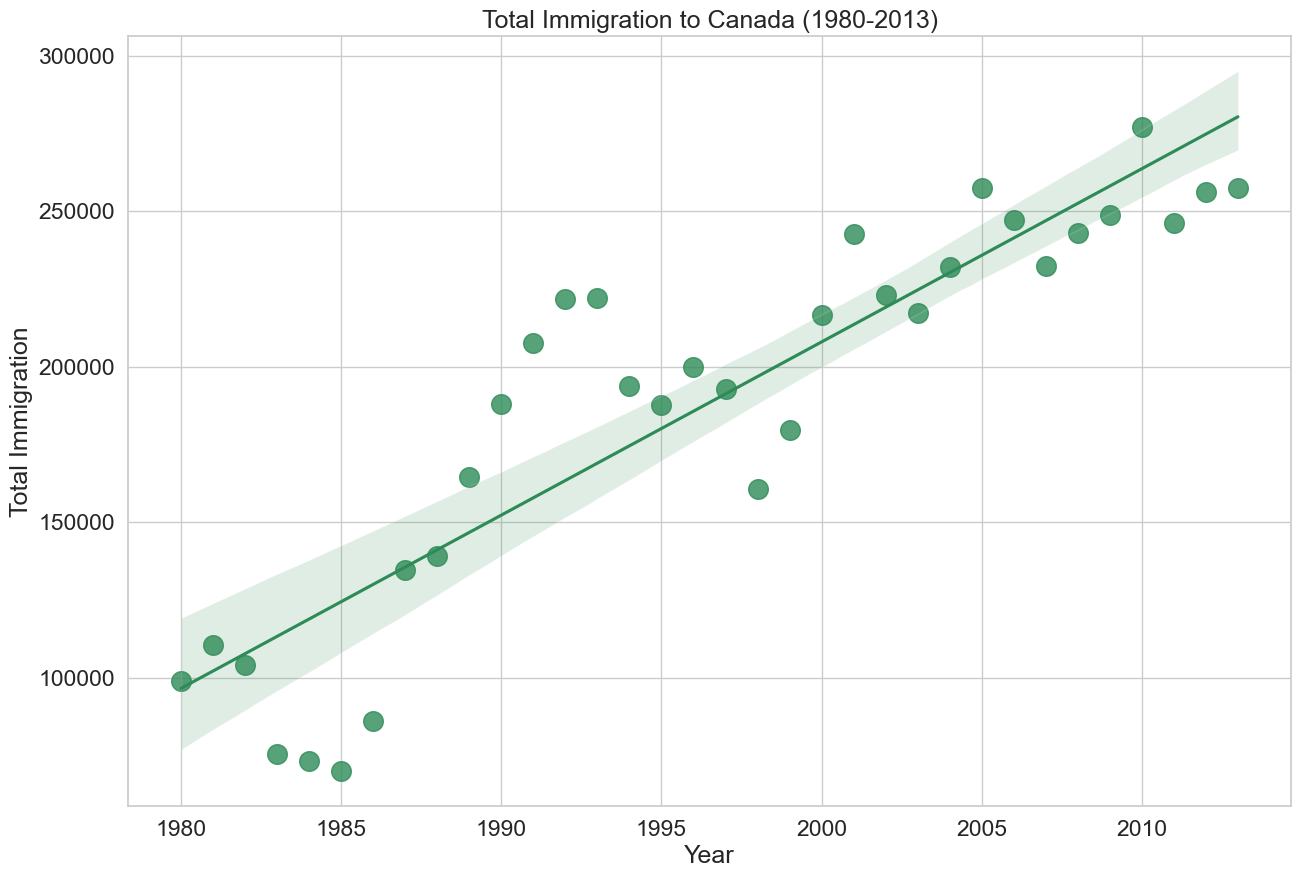

In [70]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total',
            data=df_total,
            color='seagreen',
           scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration',
       title='Total Immigration to Canada (1980-2013)')


##### Let's make another regression plot, this time only looking at immigration from Denmark, Sweden, and Norway. (1980-2013)

In [82]:
# extracting sum of immigration of Denmar, Sweden, and Norway per year
df_dns_total = pd.DataFrame(df_dns[years].sum(axis=0))
df_dns_total.index = map(float, df_total.index)
df_dns_total.reset_index(inplace=True)
df_dns_total.columns = ['year','total']
df_dns_total.head()

,year,total
0,0.0,669
1,1.0,678
2,2.0,627
3,3.0,333
4,4.0,252


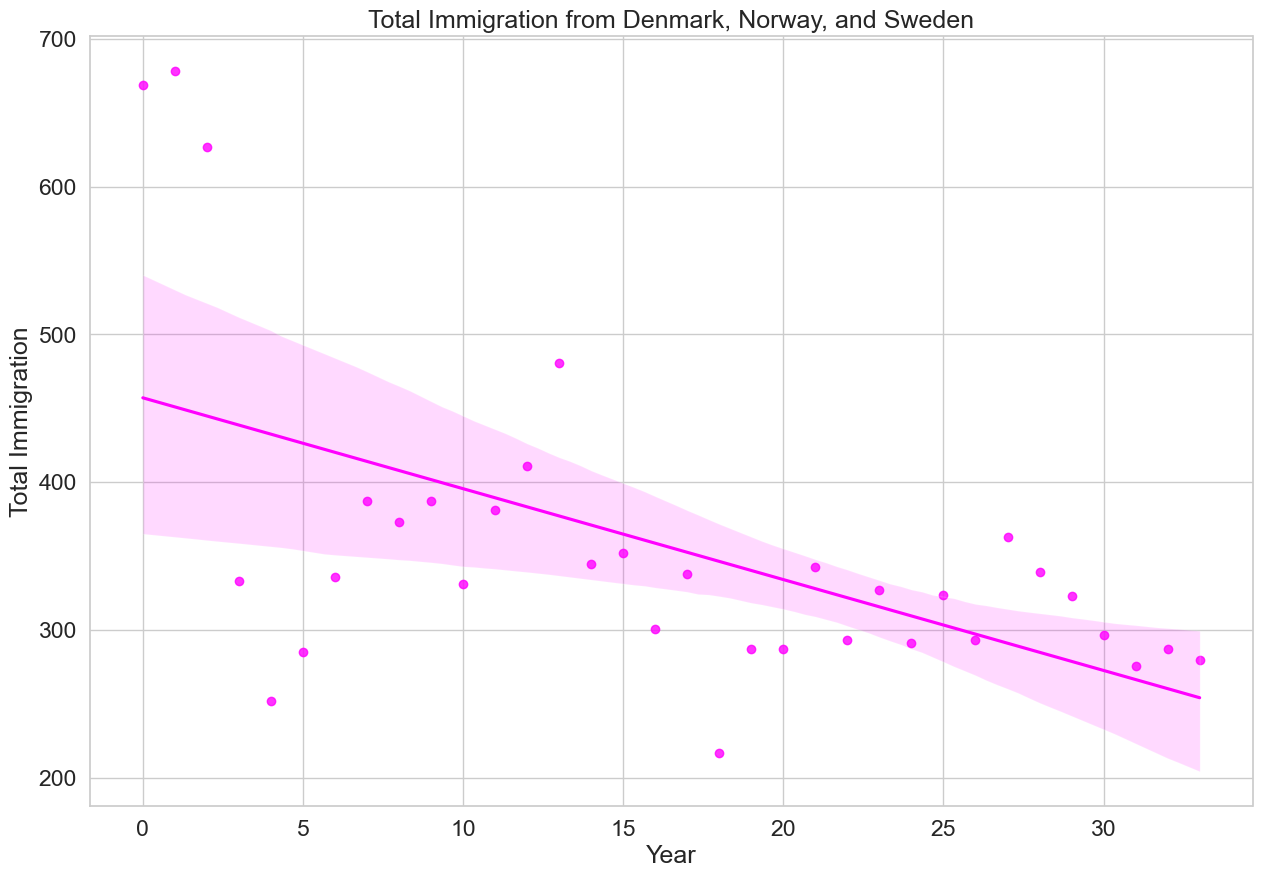

In [88]:
plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_dns_total, color='magenta')
ax.set(xlabel='Year', ylabel='Total Immigration',
       title='Total Immigration from Denmark, Norway, and Sweden')
plt.show()